# Benchmarking: retrieving and comparing against published results

You can access all archived published results for time series classification (TSC)
directly with aeon. These results are all stored on the website
[timeseriesclassification.com](https://timeseriesclassification.com). Coming soon,
equivalent results for clustering and classification. These are reference results and
 will not change. The mechanism for recovering these results is intentionally hard
 coded and not generalised, to remove any potential for confusion. To more flexibly
 load the latest results for classification, clustering and regression, see the
 notebook [Loading reference results](./reference_results.ipynb).

These results were presented in three bake offs for classification: The first bake
off [1] used 85 UCR univariate TSC datasets. The second bake off [2] introduced the
multivariate TSC archive, and compared classifier performance. The third bake off [3],
the bake off redux, compared univariate classifiers on 112 UCR datasets. Note the
third bake off, or bake off redux as we call it, introduced 30 new datasets.
These data and results for them will be available if the paper is accepted for
publication.

We provide dictionary of classifier/index in results used in each bake off in
the file ``aeon.benchmarking.results_loaders``.

We compare results with the critical difference graph described in the benchmarking
documentation. Note that
the way we group classifiers has slightly changed and hence there may be small
variation in cliques from published results.

The published results for two bake offs can be recovered from [time series
repo](https://timeseriesclassification.com/results/PublishedResults/) directly or
with aeon.

## [The great time series classification bake off, 2017](https://link.springer.com/article/10.1007/s10618-016-0483-9)

The first TSC bake off, conducted in 2015 and published in 2017 compared 25
classifiers on the 85 UCR data that were released in 2015. The classifiers used are:

In [8]:
from aeon.benchmarking.results_loaders import uni_classifiers_2017

print(uni_classifiers_2017.keys())

dict_keys(['ACF', 'BOSS', 'CID_DTW', 'CID_ED', 'DDTW_R1_1NN', 'DDTW_Rn_1NN', 'DTW_F', 'EE', 'ERP_1NN', 'Euclidean_1NN', 'FlatCOTE', 'FS', 'LCSS_1NN', 'LPS', 'LS', 'MSM_1NN', 'PS', 'RotF', 'SAXVSM', 'ST', 'TSBF', 'TSF', 'TWE_1NN', 'WDDTW_1NN', 'WDTW_1NN'])


The dataset used for the first bake off [1] are described in [4] and listed as
``uni_classifiers_2017``. They are listed as:

In [9]:
from aeon.datasets.tsc_datasets import univariate2015

print(
    f"The {len(univariate2015)} UCR univariate datasets described in [4] and used in "
    f"2017 bakeoff [1]:\n{univariate2015}"
)

The 85 UCR univariate datasets described in [4] and used in 2017 bakeoff [1]:
{'MiddlePhalanxTW', 'TwoLeadECG', 'WormsTwoClass', 'Meat', 'MiddlePhalanxOutlineCorrect', 'Beef', 'ArrowHead', 'ECG5000', 'ScreenType', 'Wine', 'Adiac', 'Coffee', 'DistalPhalanxOutlineCorrect', 'OliveOil', 'Symbols', 'Lightning2', 'SonyAIBORobotSurface2', 'Computers', 'Haptics', 'UWaveGestureLibraryY', 'FacesUCR', 'SwedishLeaf', 'WordSynonyms', 'ProximalPhalanxTW', 'ProximalPhalanxOutlineAgeGroup', 'ShapeletSim', 'Herring', 'Car', 'CricketY', 'UWaveGestureLibraryZ', 'Phoneme', 'PhalangesOutlinesCorrect', 'HandOutlines', 'InlineSkate', 'SyntheticControl', 'Yoga', 'ProximalPhalanxOutlineCorrect', 'ToeSegmentation2', 'Ham', 'CricketZ', 'Trace', 'Worms', 'UWaveGestureLibraryAll', 'CricketX', 'DiatomSizeReduction', 'FordA', 'CinCECGTorso', 'MedicalImages', 'FaceAll', 'Plane', 'ToeSegmentation1', 'RefrigerationDevices', 'OSULeaf', 'MoteStrain', 'ShapesAll', 'CBF', 'ECG200', 'Lightning7', 'SonyAIBORobotSurface1', 'S

You can pull down results for the original bake off for either the default train/test
split and for results averaged over 100 resamples.

In [10]:
from aeon.benchmarking.results_loaders import get_bake_off_2017_results

default = get_bake_off_2017_results()
averaged = get_bake_off_2017_results(default_only=False)
print(
    f"{len(univariate2015)} datasets in rows, {len(uni_classifiers_2017)} classifiers "
    f"in columns"
)

85 datasets in rows, 25 classifiers in columns


Once you have the results you want, you can compare classifiers with built in aeon
 tools.


Suppose we want to recreate the critical difference diagram
 published in [1]:

<img src="img/bakeoff2015.png" width="1000" alt="bake off 2015">

This displays the critical difference diagram [6] for comparing classifiers. It shows
 the average rank of each estimator over all datasets. It then groups estimators for
 which there is no significant difference in rank into cliques, shown with a solid
 bar. The published results used the original method for finding cliques called the
 post hoc Nemenyi test. Our plotting tool offers this as an alternative. See the docs
  for ``aeon.visualisation.plot_critical_difference`` for more details. To recreate the
 above, we can do this (note slight difference in names, ``MSM_1NN`` is `MSM` and
 ``FlatCOTE`` is ``COTE``.

AttributeError: 'tuple' object has no attribute 'show'

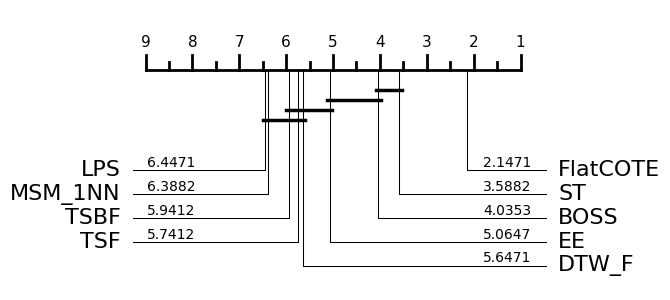

In [11]:
from aeon.visualisation import plot_critical_difference

classifiers = ["MSM_1NN", "LPS", "TSBF", "TSF", "DTW_F", "EE", "BOSS", "ST", "FlatCOTE"]
# Get columm positions of classifiers in results
indx = [uni_classifiers_2017[key] for key in classifiers if key in uni_classifiers_2017]
plot = plot_critical_difference(averaged[:, indx], classifiers, test="Nemenyi")
plot.show()

Note there are some  small differences in averaged rank. This may be due to
differences in how ties in rank were handled. The cliques are identical. Given that
these results were generated in 2014/2015 and matlab was used to draw the diagrams, we think this
is an acceptable reproduction. Subsequent to the 2015 bake off we switched to using
pairwise Wilcoxon sign rank tests with the Holm correction. This creates slightly
different cliques.

## The great multivariate time series classification bake off [2], 2021
[Link to paper](https://link.springer.com/article/10.1007/s10618-020-00727-3)

The multivariate bake off [2] launched a new archive and compared 11 classifiers on 26
multivariate TSC problems

In [ ]:
from aeon.benchmarking.results_loaders import multi_classifiers_2021
from aeon.datasets.tsc_datasets import multivariate_equal_length

print(multi_classifiers_2021.keys())
print(
    f"The {len(multivariate_equal_length)} TSML multivariate datasets described in "
    f"and used in the 2021 multivariate bakeoff [1]:\n{multivariate_equal_length}"
)

The results table below shows the performance figures for accuracy, balanced
accuracy, AUROC and F1.

<img src="img/bakeoff2021.png" width="1000" alt="bake off 2021">

We can recreate the accuracy graph by loading the results from tsc.com and plotting
like so:

In [ ]:
from aeon.benchmarking.results_loaders import get_bake_off_2021_results

default = get_bake_off_2021_results()
averaged = get_bake_off_2021_results(default_only=False)
print("Shape of results = ", averaged.shape)

In [ ]:
plot = plot_critical_difference(averaged, list(multi_classifiers_2021.keys()))

Note there are some differences in cliques due to slightly different methodology.
This will be explained in more detail in a technical document soon. We will also
add more reference results in due course.